<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience2/blob/main/DS02_Assg07_RecommenderSystems_RezShok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7: Movie Recommender

**Objective**: Develop two recommender systems, one based on collaborative filtering using matrix factorization and another based on a content-based approach using multiple features of the data.

## Your major tasks are:
1. Describing the dataset in detail.
2. Preparing dataset ready for the models
3. Training Matrix Factorization as oen methods of Collaborative Filtering
4. Training Content-based model
5. Discuss the result of the models with one or two example of recommendation.

In [35]:
# Import necessary Libraries for dataframes, arrays, and train_test_split

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [36]:
# Load the data
ratings_url = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.data'
movies_url = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.item'

In [37]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k/u.data

--2024-01-08 05:12:46--  http://files.grouplens.org/datasets/movielens/ml-100k/u.data
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1979173 (1.9M)
Saving to: ‘u.data.1’

u.data.1            100%[===================>]   1.89M  4.61MB/s    in 0.4s    

2024-01-08 05:12:46 (4.61 MB/s) - ‘u.data.1’ saved [1979173/1979173]



In [38]:
# Load the data
ratings_url = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.data'
movies_url = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.item'
# remember that you have to search about this famous dataset


ratings = pd.read_csv(ratings_url, sep=r'\t+', names=['user_id', 'movie_id', 'rating', 'timestamp'])
# Load the movies data
movies = pd.read_csv(movies_url, sep='|', header=None, encoding='latin-1')

# Define the correct column names (adjust based on actual data format)
movies.columns = ['movie_id', 'title', 'release_date', 'video_release_date',
                  'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
                  'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                  'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
                  'Thriller', 'War', 'Western']

# Drop unnecessary columns if needed
movies = movies.drop(['video_release_date', 'IMDb_URL'], axis=1)

# Merge datasets
data = pd.merge(ratings, movies, on="movie_id")

# Train-test split with 80% train share
train_data, test_data = train_test_split(data, test_size=0.2)

# Aggregate the data to avoid duplicates
train_data_grouped = train_data.groupby(['user_id', 'movie_id']).agg({'rating': 'mean'}).reset_index()

# Create the user-item matrix
train_matrix = train_data_grouped.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)

# For the test matrix, you might need to repeat the same process
test_data_grouped = test_data.groupby(['user_id', 'movie_id']).agg({'rating': 'mean'}).reset_index()
test_matrix = test_data_grouped.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)

<ipython-input-38-32602fa9c14d>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv(ratings_url, sep=r'\t+', names=['user_id', 'movie_id', 'rating', 'timestamp'])


### EDA

In [39]:
print(ratings.shape)
ratings.head()

(100000, 4)


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [40]:
print(movies.shape)
movies.head()

(1682, 22)


,movie_id,title,release_date,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [41]:
print(data.shape)
data.head()

(100000, 25)


,user_id,movie_id,rating,timestamp,title,release_date,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
data["rating"].unique()

array([3, 5, 4, 2, 1])

In [43]:
data["rating"].value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

In [44]:
data["rating"].value_counts().values

array([34174, 27145, 21201, 11370,  6110])

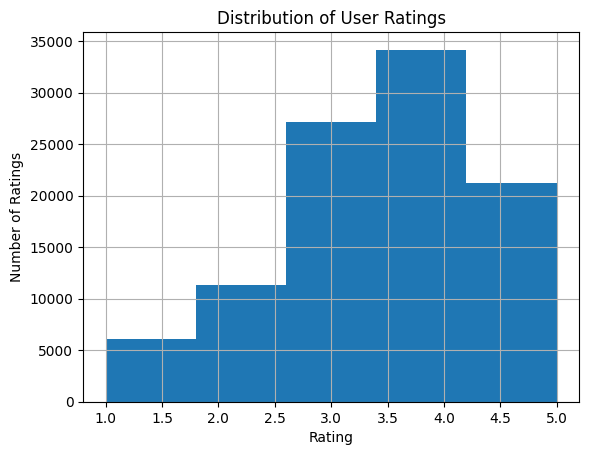

In [45]:
import matplotlib.pyplot as plt

# Example: Distribution of User Ratings
data['rating'].hist(bins=5)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()


# you should provide more visualization to illustrate the nature of the dataset

<BarContainer object of 5 artists>

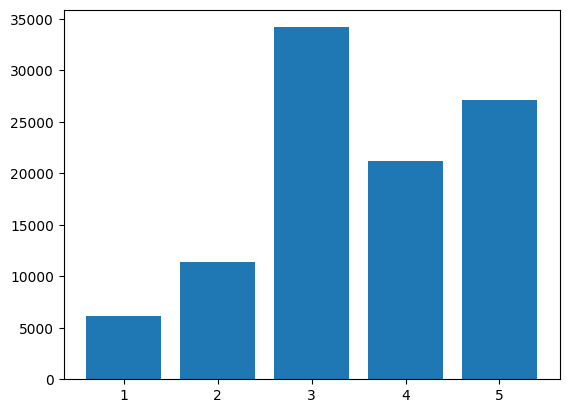

In [46]:
plt.bar(data["rating"].unique(), data["rating"].value_counts().values)

In [47]:
import datetime

def epoch_to_year(epoch):
  return datetime.datetime.fromtimestamp(epoch).strftime('%Y')

rating_years = ratings["timestamp"].apply(epoch_to_year)
rating_years

0        1997
1        1998
2        1997
3        1997
4        1998
         ... 
99995    1997
99996    1997
99997    1997
99998    1997
99999    1997
Name: timestamp, Length: 100000, dtype: object

<Axes: xlabel='rating'>

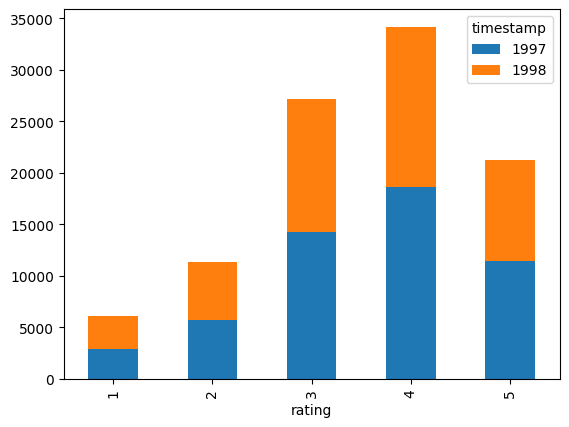

In [48]:
crosstab_year_ratings = pd.crosstab(ratings["rating"], rating_years)
crosstab_year_ratings.plot(kind="bar", stacked=True)

<Axes: xlabel='rating'>

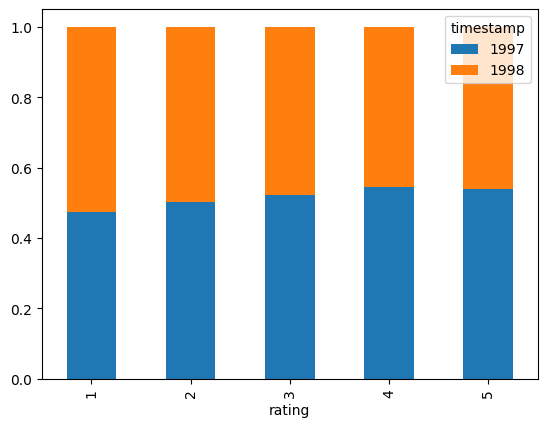

In [49]:
crosstab_year_ratings_norm = crosstab_year_ratings.div(crosstab_year_ratings.sum(1), axis=0)
crosstab_year_ratings_norm.plot(kind="bar", stacked=True)

In [50]:
action_ratings = data[["rating"]][data["Action"] == 1]
action_ratings.value_counts()

rating
4         8431
3         7254
5         5103
2         3254
1         1547
dtype: int64

In [51]:
genres = ['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
          'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

genre_counts = np.array([data[genre][data[genre] ==1].value_counts().values[0]
                        for genre in genres])

df_genres = pd.DataFrame({"genre":genres, "count":genre_counts})
df_genres

,genre,count
0,unknown,10
1,Action,25589
2,Adventure,13753
3,Animation,3605
4,Children,7182
5,Comedy,29832
6,Crime,8055
7,Documentary,758
8,Drama,39895
9,Fantasy,1352


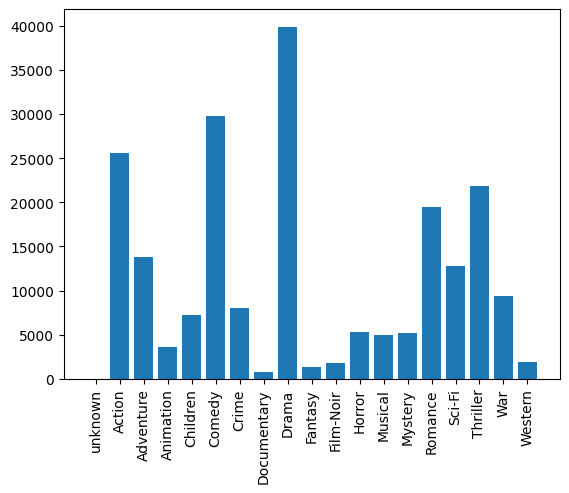

In [52]:
plt.bar(genres, genre_counts)
plt.xticks(rotation=90)
plt.show()

In [53]:
genre_np = np.array([])

for genre in genres:
  genre_rating = data[["rating"]][data[genre] == 1]
  for rating in range(1,6):
    genre_np = np.append(genre_np, len(genre_rating[genre_rating["rating"] == rating]))

In [54]:
genre_df = pd.DataFrame(genre_np.reshape(len(genres),5),
                        index=genres,
                        columns=[f"rating_{i}" for i in range(1,6)])
genre_df

,rating_1,rating_2,rating_3,rating_4,rating_5
unknown,2.0,0.0,3.0,4.0,1.0
Action,1547.0,3254.0,7254.0,8431.0,5103.0
Adventure,804.0,1709.0,3901.0,4436.0,2903.0
Animation,186.0,373.0,1018.0,1232.0,796.0
Children,574.0,961.0,2218.0,2212.0,1217.0
Comedy,2279.0,3856.0,8751.0,9722.0,5224.0
Crime,417.0,834.0,2006.0,2835.0,1963.0
Documentary,59.0,58.0,164.0,268.0,209.0
Drama,1766.0,3647.0,9877.0,14608.0,9997.0
Fantasy,112.0,220.0,461.0,383.0,176.0


In [55]:
print(train_data_grouped.shape)
train_data_grouped

(80000, 3)


,user_id,movie_id,rating
0,1,1,5.0
1,1,2,3.0
2,1,3,4.0
3,1,4,3.0
4,1,5,3.0
...,...,...,...
79995,943,1044,3.0
79996,943,1067,2.0
79997,943,1188,3.0
79998,943,1228,3.0


### Matrix Factorization (Collaborative Filtering)

In [56]:
from scipy.sparse.linalg import svds

# Perform matrix factorization
U, sigma, Vt = svds(train_matrix.values, k=50)

# Predictions
sigma = np.diag(sigma)
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# you should interpret the result that this model has provided.
predicted_ratings

array([[ 2.77665112e+00,  2.98170932e+00,  1.36569518e+00, ...,
         1.13197046e-02,  9.84411389e-02,  7.75669515e-03],
       [ 3.18182349e+00,  3.43591398e-01,  1.87653215e-01, ...,
         2.11531683e-02, -1.38285380e-02, -4.48364278e-02],
       [-6.06825241e-02, -1.39296553e-01,  8.97359217e-02, ...,
         3.68870087e-02,  7.26842784e-03,  1.02141533e-02],
       ...,
       [ 2.74453720e+00,  1.54714850e-01,  2.72467687e-01, ...,
        -4.34847494e-03,  8.26229287e-03, -1.79237047e-02],
       [ 1.25750501e+00,  2.22468732e-01, -4.07523011e-01, ...,
         1.82649764e-02,  4.89962746e-02, -8.05896409e-03],
       [ 2.14829118e+00,  2.37655414e+00,  6.25888779e-01, ...,
         2.35042237e-04,  5.94853490e-02, -4.44873722e-02]])

In [57]:
predicted_ratings.shape

(943, 1645)

In [58]:
pd.DataFrame(predicted_ratings)

,0,1,2,3,4,5,6,7,8,9,...,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644
0,2.776651,2.981709,1.365695,2.702476,1.498741,1.097067,5.397066,2.451910,1.672820,1.672852,...,-0.004910,0.056541,0.037053,0.026250,0.002225,0.082042,0.003773,0.011320,0.098441,0.007757
1,3.181823,0.343591,0.187653,0.365398,0.261186,-0.061479,0.797276,-0.831072,1.750040,0.557421,...,0.003273,-0.005012,0.018615,0.041310,-0.003842,-0.020023,0.007051,0.021153,-0.013829,-0.044836
2,-0.060683,-0.139297,0.089736,0.326587,-0.004234,0.009064,0.863186,0.236202,-0.046640,0.159504,...,0.004889,0.012214,-0.001084,-0.018094,0.029578,0.009926,0.012296,0.036887,0.007268,0.010214
3,0.287094,-0.031578,0.288119,0.038391,0.059692,0.061757,0.291630,-0.186938,0.010880,-0.355700,...,0.004296,-0.007821,0.008422,0.000636,-0.015049,0.008042,0.005366,0.016099,-0.012797,-0.006585
4,3.954609,1.335234,0.343187,0.663317,0.118156,0.089841,1.353410,0.952051,-0.200010,0.841564,...,0.000715,-0.034667,0.002480,-0.075661,-0.024055,-0.048715,0.001609,0.004828,-0.054946,-0.024584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,1.611298,-0.008418,0.094700,0.159960,0.403144,0.170753,0.993738,0.401859,2.337437,0.291438,...,-0.001123,0.020639,0.029767,0.002929,0.027590,0.021737,-0.009409,-0.028227,0.028320,-0.047806
939,1.387534,-0.380228,-0.218247,1.968782,0.157363,-0.126273,2.084517,2.042234,0.588660,-0.207917,...,0.006144,-0.030381,-0.017463,0.025474,-0.010736,0.015418,0.005269,0.015808,-0.031046,-0.036518
940,2.744537,0.154715,0.272468,-0.311885,-0.044317,0.029475,1.175248,0.642898,0.579595,-0.061555,...,0.001839,-0.003788,0.005796,-0.027661,-0.029033,0.015085,-0.001449,-0.004348,0.008262,-0.017924
941,1.257505,0.222469,-0.407523,-1.260642,0.024124,0.090143,-0.301019,1.526687,-0.486989,0.152100,...,0.007162,0.014611,0.014066,-0.029128,-0.024157,-0.013170,0.006088,0.018265,0.048996,-0.008059


### Content-based Filtering

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming the genre columns start from the 'unknown' column inclusive onwards
genres_matrix = movies.iloc[:, 3:]

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(genres_matrix, genres_matrix)

In [60]:
genres_matrix

,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.57735027,
        0.        ],
       [0.        , 1.        , 0.57735027, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.57735027, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.70710678],
       [0.57735027, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.70710678, 0.        ,
        1.        ]])

In [62]:
def content_based_recommendations(movie_id, cosine_sim=cosine_sim, movies=movies, top_n=10):
    # Find the index of the given movie
    idx = movies.index[movies['movie_id'] == movie_id].tolist()[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top-n most similar movies
    sim_scores = sim_scores[1:top_n+1]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top-n most similar movies
    return movies['title'].iloc[movie_indices]

# Example usage
print(content_based_recommendations(1))

421     Aladdin and the King of Thieves (1996)
94                              Aladdin (1992)
1218                     Goofy Movie, A (1995)
62                    Santa Clause, The (1994)
93                           Home Alone (1990)
101                     Aristocats, The (1970)
137                D3: The Mighty Ducks (1996)
138                       Love Bug, The (1969)
168                 Wrong Trousers, The (1993)
188                    Grand Day Out, A (1992)
Name: title, dtype: object
